In [ ]:
# library & dataset
import pandas as pd
import numpy as np
import seaborn as sns


#Load the Excel data into a DataFrame object
excel_data_df = pd.ExcelFile('V02Max_Combined.xlsx')

sheet_kayaking = pd.read_excel(excel_data_df, sheet_name = 'Kayaking')
sheet_Athletes = pd.read_excel(excel_data_df, sheet_name ='Athletes')
sheet_Triathlon = pd.read_excel(excel_data_df, sheet_name ='Triathlon')
sheet_Fencing = pd.read_excel(excel_data_df, sheet_name ='Fencing')

42. What was the difference in heart rate between warm up and GET for athlete 1

45. Create a dummy array with no data with a size of 15.

In [183]:
dumArr = np.array(16)
print("Dummy array with no data with size :",dumArr)

Dummy array with no data with size : 16


50. Create a violin chart using any 2 columns in the dataset(using Fencing dataset)

hello
end


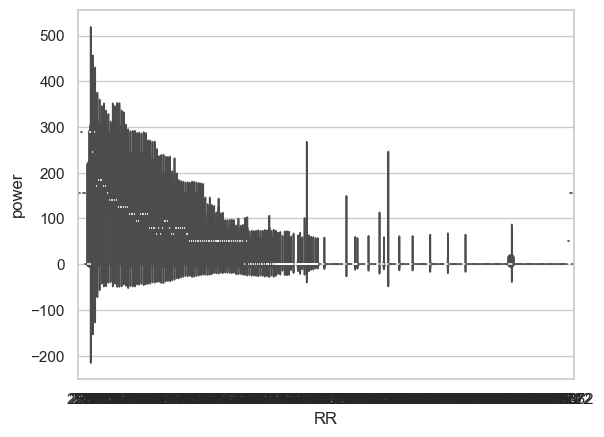

In [201]:
sns.set(style = 'whitegrid')
sns.violinplot(x= sheet_Fencing['RR'],y= sheet_Fencing['power'])

In [ ]:
50. Create a violin chart using any 2 columns in the dataset ( random 100 rows)

<Axes: xlabel='RR', ylabel='power'>

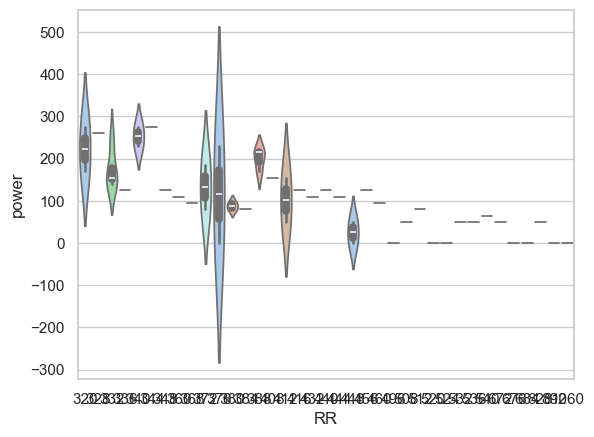

In [280]:
# Selecting 50 random rows and specific columns
random_rows= sheet_Fencing.sample(n=50).loc[:, ['RR', 'power']]
# use to set style of background of plot
sns.set(style = 'whitegrid')
sns.violinplot(x= random_rows['RR'],y= random_rows['power'],palette="pastel")
